# <span style="color: black; font-family: Babas Neue; font-size: 3em;">Tutoriel 2.0</span>
<hr height="3" style="color:purple;background-color:purple;"></hr>
<span style="color: black; font-family: Babas Neue; font-size: 1em;">Traitement et visualisation de données. Utilisation du catalogue de l'Observatoire Global du Saint-Laurent (OGSL), contenant diverses bases de données sur le climat et la biodiversité du fleuve Saint-Laurent. </span>

<br>
<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Bienvenue à notre deuxième tutoriel! Nous allons explorer ici diverses techniques pour traiter et visualiser des données structurées. Ce projet est différent de notre premier tutoriel, qui était porté sur l'extraction de données et la création de bases de données. Ce projet s'inscrit donc plus tardivement dans le cycle analytique (Extraction » Traitement » Visualisation » Modélisation). Nous travaillons sur des bases de données qui existent déjà. <br><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Nous avons choisi le catalogue de l'OGSL pour notre tutoriel car il possède une large variété de bases de données, ce qui va nous permettre de jumeler plusieurs bases de données et essayer, du mieux qu'on peut, de les rendre complémentaires. De plus, l'OGSL est très orientée sur l'open source, ce qui nous facilite énormément pour avoir un accès aux données. <br><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Pour mener à bien ce projet, nous utiliserons le langage python à l'intérieur de l'environnement Anaconda. Comme j'ai expliqué dans notre premier tutoriel, Anaconda est un écosystème d'applications, de paquets et de modules pour les sciences des données.Si vous souhaitez exécuter les codes par vous-même et explorer, veuillez installer la suite Anaconda pour python 3.6. Sinon, vous pouvez aussi lire ce fichier - sans l'exécuter - comme une sorte de rapport, car j'y ai intégré des commentaires ainsi que les résultats des scripts.
</span></div>

1.0 Réseau Québécois d'Urgence pour les Mammifères Marins

###### <span style="color: black; font-family: Babas Neue; font-size: 2em;">1.0 Réseau Québécois d'Urgence pour les Mammifères Marins (RQUMM) </span>

###### <div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;">1.1 Téléchargement</span></div>

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> L'utilisateur 'normal' d'un ordinateur, soit ceux qui utilise une interface graphique, a l'habitude pour télécharger, d'aller sur un site et cliquer sur un lien, faisant jaillir une fenêtre qui va permettre de sauvegarder un fichier précis. Nous allons le faire ici directement avec une commande.<br><br>Nous allons utiliser le préfixe '!' pour parler directement à notre machine (nous ne sommes plus dans le langage python lorsque nous commençons le script avec ce préfixe). Ensuite, nous utilisons le programme wget, dédié au téléchargement de paquets. </span></div> 

In [1]:
!wget -c http://catalogue.ogsl.ca/dataset/7b63dd5d-a578-4375-aa44-b067d179571e/resource/d0342eee-4741-4b75-953f-daa807845ef2/download/base-de-donnees_rqumm.xlsx

--2017-09-14 23:35:49--  http://catalogue.ogsl.ca/dataset/7b63dd5d-a578-4375-aa44-b067d179571e/resource/d0342eee-4741-4b75-953f-daa807845ef2/download/base-de-donnees_rqumm.xlsx
Résolution de catalogue.ogsl.ca (catalogue.ogsl.ca)… 132.215.7.30
Connexion à catalogue.ogsl.ca (catalogue.ogsl.ca)|132.215.7.30|:80… connecté.
requête HTTP transmise, en attente de la réponse… 416 Request Range Not Satisfiable

    Le fichier a déjà été complètement récupéré ; rien à faire.



###### <div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;">1.2 Ouverture</span></div>

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Nous allons utiliser le module pandas pour ouvrir la base de données. Nous allons nommer l'objet 'rqumm_df'. Cette base de données, initialement en format excel, est entré ici comme un objet 'DataFrame'. Pour la suite des choses, nous entendrons par 'df' une grille traditionnelle de données gérées par pandas.</span></div>

In [1]:
import pandas as pd
import numpy as np

rqumm_df = pd.read_excel('base-de-donnees_rqumm.xlsx') # Créer un objet DataFrame ayant comme valeur le fichier .xls
rqumm_df.head() # Afficher le début

,No d'incident,Date de l'appel,Type d'incident,Espèce,Nombre d'individus,Région,Municipalité,Lieu / Secteur,Latitude,Longitude,Indice de position
0,2016001,2016-01-07,Carcasse rivage,Phoque du Groenland,1,Fleuve aval,Portneuf,NaN,46.686630,-71.890343,2
1,2016002,2016-01-12,Carcasse rivage,Phoque du Groenland,1,Bas-Saint-Laurent,Rimouski,Pointe-au-Père,48.527828,-68.427830,2
2,2016003,2016-01-15,Carcasse rivage,Marsouin commun,1,Gaspésie,Gaspé,Petit-Gaspé,48.804715,-64.246888,3
3,2016004,2016-01-28,Carcasse rivage,Phoque du Groenland,1,Bas-Saint-Laurent,La Pocatière,NaN,47.379900,-70.054836,6
4,2016005,2016-03-12,Carcasse rivage,Cétacé sp.,1,IDLM,Les Îles-de-la-Madeleine,Havre-Aubert,47.237382,-61.828340,6


In [2]:
rqumm_df.tail() # Afficher la fin

,No d'incident,Date de l'appel,Type d'incident,Espèce,Nombre d'individus,Région,Municipalité,Lieu / Secteur,Latitude,Longitude,Indice de position
808,2012007,2012-03-30,Harcèlement,Phoque à capuchon,1,Gaspésie,Chandler,NaN,48.351260,-64.670680,2
809,2012006,2012-03-29,Harcèlement,Phoque du Groenland,1,Gaspésie,Maria,NaN,48.170493,-65.987148,3
810,2012005,2012-03-24,Carcasse rivage,Phoque du Groenland,1,Bas-Saint-Laurent,Matane,Petit-Matane,48.860956,-67.462895,2
811,2012004,2012-03-12,Carcasse rivage,Phoque du Groenland,1,Gaspésie,Sainte-Anne-des-Monts,NaN,49.127182,-66.545370,3
812,2012003,2012-02-23,Carcasse rivage,Phoque à capuchon,1,IDLM,Les Îles-de-la-Madeleine,Grosse-Île,47.618755,-61.559626,4


###### <div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;">1.3 Informations globales</span></div>

In [3]:
rqumm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 11 columns):
No d'incident         813 non-null int64
Date de l'appel       813 non-null datetime64[ns]
Type d'incident       813 non-null object
Espèce                813 non-null object
Nombre d'individus    813 non-null object
Région                813 non-null object
Municipalité          813 non-null object
Lieu / Secteur        413 non-null object
Latitude              813 non-null float64
Longitude             813 non-null float64
Indice de position    813 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 69.9+ KB


<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> La fonction 'df.info()' nous informe que : <br><br>
1. Il s'agit bien d'un objet pandas.DataFrame, qui est l'équivalent d'une base de données sur python.<br>
2. Il y a 813 entrées, donc 813 cas répertoriés, avec un index standard (de 0 à 812). <br>
3. Il y a 11 colonnes, quatre de nombres (les int64 et les float64), une de dates et six d'objets, qui s'avèrent dans notre cas être de simples chaînes de caractères - du texte, dit autrement -. <br>
4. Dans le cas de la colonne 'Lieu / Secteur', environ la moitié des données est manquante.<br>
5. La base de données occupe 0.699 méga-octets.

</span></div>

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;">À première vue, on peut constater également que la colonne 'Nombre d'individus' est comprise comme une série d'objets, et non comme une série de nombres. Pour voir plus clair, nous pouvons utiliser la fonction .unique(). Celle-ci va nous permettre de lister les différentes valeurs uniques de la colonne.</span></div>

In [4]:
exemple = [1,1,1,2,2,2,2,3,4,4]
set(exemple)  # set(liste) fonctionne pour lister les éléments uniques

{1, 2, 3, 4}

In [5]:
rqumm_df["Nombre d'individus"].unique() # deux méthodes pour le même résultat

array([1, 2, 5, 3, 'Morceaux', 'morceaux', 8, '3 à 7', 'centaine'], dtype=object)

In [6]:
rqumm_df[rqumm_df["Nombre d'individus"] == 'centaine']

,No d'incident,Date de l'appel,Type d'incident,Espèce,Nombre d'individus,Région,Municipalité,Lieu / Secteur,Latitude,Longitude,Indice de position
806,2012009,2012-03-30,Carcasse rivage,Phoque sp.,centaine,IDLM,Les Îles-de-la-Madeleine,Fatima,47.426099,-61.868949,4


##### Une centaine d'individus échouchés ?

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> La colonne 'Nombre d'individus' de notre base de données n'est pas comprise comme une colonne de nombres à cause de certaines valeurs particulières qui contiennent du texte. Dans le cas présent, il s'agit de 'morceaux, 'centaine' et '3 à 7'. <br><br>Face à cette observation se dresse un dilemme typique de l'analyse de données, particulièrement lorsqu'elle a pour vocation d'être scientifique. Dans un premier cas, dans un souçi de rigueur, on ne modifierait pas les valeurs. Cela implique, soit de continuer avec ses données partiellement non-structurées, ou tout simplement enlever les quelques rangées qui sont particulières. <br><br>Dans un deuxième cas, et cela est beaucoup le cas dans le machine learning et le deep learning, on peut tenter d'imputer une valeur à ces cas atypiques. Ici, cela reviendrait à convertir 'centaine' par 100, 'morceaux' par 1, '3 à 7' par 5.. Dans d'autres cas, comme les analyses longitudinales qui contiennent énormément de caractéristiques pour chaque entrées, on peut essayer d'imputer une valeur à la variable en fonction des autres valeurs de sa rangée. Par exemple, dans une base de données sur les prix immobiliers, certaines données indisponibles (comme le nombre de salles de bain) peuvent être statistiquement estimées à partir de d'autres facteurs (le nombre de chambre, le nombre de salles de bain des maisons voisines, le nombre d'étages). <br><br> Remplir - manuellement ou par une estimation statistique - les valeurs indisponibles nous permet d'obtenir de meilleurs résultats lorsqu'est venu le temps d'élaborer des modèles prédictifs. Dans notre exemple des prix immobliers, l'indice de performance pour estimer le prix d'une propriété est meilleur si nous estimons au préalablement les données indisponibles que si nous en faisons fi. Pour résumé, ce que l'on gagne en prédiction et en performance modélistique, on le perd en rigueur et en précision; On arrondit pour mieux prédire, ou on garde les données dans leurs particularités?<br><br>Pour notre cas, où nous ne construirons pas de modèles prédictifs et où la base de donnée doit garder une forte représentativité avec le phénomène qu'elle étudie, nous pouvons laisser la colonne intact. Néanmoins, pour le tutoriel, nous allons créer un code qui va départir la base de données de ses valeurs indisponibles, et convertir les objets en nombre entier.

</span></div>

In [7]:
def is_int_convertible(v): # Cette fonction retourne vrai ou faux si la variable peut se convertir en nombre
    try:                   # Nous allons l'utiliser sur la colonne contenant des données hétérogènes
        int(v)             # Et conserver dans la base de données les rangées qui avaient leurs nombre d'individus
        return True        # Convertible en nombre entier
    except ValueError:
        return False
    
###

rqumm_df_without_outliers = rqumm_df[
    list(
        map(
            lambda x: is_int_convertible(x),
            rqumm_df[
                "Nombre d'individus"
            ]
        )
    )
].reset_index(drop=True)

###

rqumm_df_without_outliers["Nombre d'individus"] = rqumm_df_without_outliers["Nombre d'individus"].astype(int)

print(
    set(
        rqumm_df_without_outliers[
            "Nombre d'individus"
        ]
    )
) # Tester le résultat

{1, 2, 3, 5, 8}


In [8]:
rqumm_df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 11 columns):
No d'incident         794 non-null int64
Date de l'appel       794 non-null datetime64[ns]
Type d'incident       794 non-null object
Espèce                794 non-null object
Nombre d'individus    794 non-null int64
Région                794 non-null object
Municipalité          794 non-null object
Lieu / Secteur        404 non-null object
Latitude              794 non-null float64
Longitude             794 non-null float64
Indice de position    794 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 68.3+ KB


<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Nous avons retiré environ une vingtaine de données particulières, et convertit le reste en nombre. Comme on peut le constater, le nombre d'individus est maintenant une colonne entièrement de nombre.</span></div>

###### <div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;">1.4 Visualisations statistiques </span></div>

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Cette colonne maintenant uniformisée va faire l'objet de notre première visualisation. Pour obtenir une vue d'ensemble, nous pouvons soit utiliser un graphique de distribution ou un graphique à barres. Le premier fonctionne mieux lorsqu'il y a beaucoup de données numériques en volume et en diversité, et le second lorsque le nombre de valeurs possibles est faible. </span></div>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/maison/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


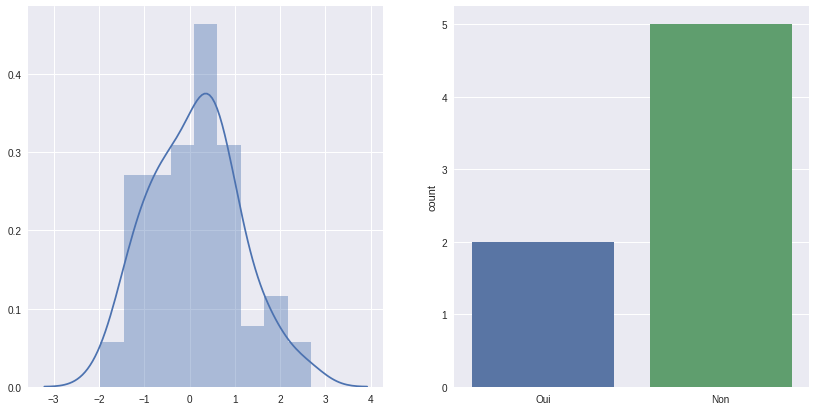

In [10]:
# Les deux graphiques types pour analyser la dispersion

ax = plt.figure(figsize=(14,7))
ax.add_subplot(121)
sns.distplot(np.random.randn(100))
ax.add_subplot(122)
sns.countplot(x=['Oui','Non', 'Non', 'Non', 'Oui', 'Non', 'Non'])

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Le module seaborn, que nous avons abbrévié 'sns', est un module construit par-dessus matplotlib, qui constitue le pillier de la visualisation sur python. Seaborn évite la syntaxe un peu compliqué de matplotlib, tout en offrant un rendu esthétiquement plus moderne. <br><br> Le module plotly, quant à lui, offre une qualité inégalée en terme de visualisation sur python, mais elle se fait au coût d'une syntaxe lourde. Le module est également impressionnant pour son haut niveau de personnalisation et sa variété de types de graphiques.</span></div>

In [11]:
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode()

col = ("Nombre d'individus", "Indice de position")

bar = []

mean_list = []

for x in range(len(col)):
    bar.append(
        go.Bar(
            x= rqumm_df_without_outliers.groupby(by=[col[x]]).count().index,
            y= rqumm_df_without_outliers.groupby(by=[col[x]]).count().ix[:,0],
            name = col[x]
        )
    )
    mean_list.append(np.mean(rqumm_df_without_outliers[col[x]]))

figure = tools.make_subplots(rows=1, cols=2, subplot_titles=col)
figure.append_trace(bar[0], 1, 1)
figure.append_trace(bar[1], 1, 2)


figure['layout'].update(
    height=600, 
    width=900, 
    title="Distribution des valeurs selon la colonne \n avec intégration d'annotations",
    annotations=[
        dict(
            x=mean_list[0],
            y=0,
            xref='x1',
            yref='y1',
            text='x̄₁ = {}'.format("{0:.2f}".format(mean_list[0])),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=mean_list[x],
            y=0,
            xref='x2',
            yref='y2',
            text='x̄2 = {}'.format("{0:.2f}".format(mean_list[1])),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
    ]
)

figure['layout']['xaxis1'].update(title=col[0])
figure['layout']['xaxis2'].update(title=col[1])

iplot(figure,filename = 'dispersion_nbindividu_indiceposition.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Avec une moyenne de 1.04, on peut aisément dire que l'entrée 'centaine' dans la colonne 'Nombre d'individus' était un cas certes à retenir pour sa particularité, mais à délaisser si l'on veut calculer des mesures de dispersion comme la moyenne et l'écart-type. </span></div>

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Les graphiques à barres sont intéressants pour visualiser des colonnes catégoriques.</span></div>

In [12]:
col = ("Type d'incident", 'Espèce', 'Région', "Municipalité")

bar = []

for x in range(len(col)):
    bar.append(
        go.Bar(
            x= rqumm_df_without_outliers.groupby(by=[col[x]]).count().index,
            y= rqumm_df_without_outliers.groupby(by=[col[x]]).count().ix[:,0],
            name = col[x]
        )
    )

figure = tools.make_subplots(rows=2, cols=2, subplot_titles=col)

trace_pos = [[0,1,1],[1,1,2],[2,2,1],[3,2,2]]
for x in range(len(trace_pos)):
    figure.append_trace(bar[trace_pos[x][0]], trace_pos[x][1], trace_pos[x][2])

figure['layout'].update(
    height=1000, 
    width=900, 
    title="Distribution des valeurs catégoriques"
)

iplot(figure,filename='dispersion_col_categoriques.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



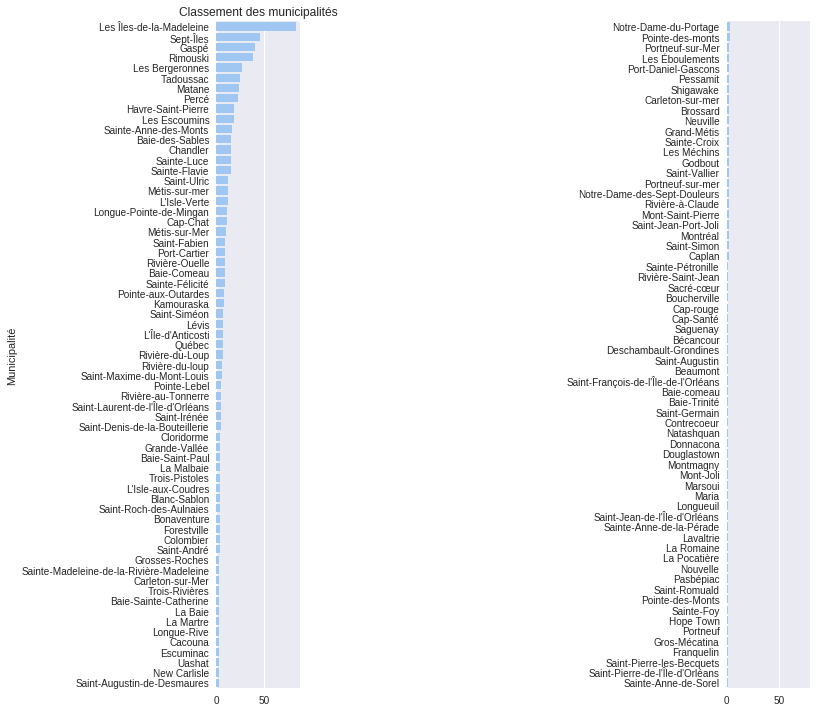

In [13]:
towndf = rqumm_df_without_outliers.groupby(['Municipalité']).count().ix[:,0].sort_values(0, ascending=False)

ax = plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")

ax.add_subplot(141)
sns.barplot(x=towndf.values[0:65], y=towndf.index[0:65], label="Municipalité", color="b")
plt.title('Classement des municipalités')
ax.add_subplot(143)
sns.barplot(x=towndf.values[65:], y=towndf.index[65:], label="", color="b")

plt.xlim(0,80)
plt.ylabel('')
plt.tight_layout()
sns.despine()

Les mesures de dispersions sont idéales pour jeter un premier coup d'oeil aux différentes caractéristiques de la base de données. Cependant, rapidement, nous voudrons analyser les colonnes en relation entre elles.

In [14]:
rqumm_df_without_outliers['mois'] = list(
    map(
        lambda x : rqumm_df_without_outliers[
            "Date de l'appel"
        ][x].month, 
        range(
            len(
                rqumm_df_without_outliers
            )
        )
    )
)

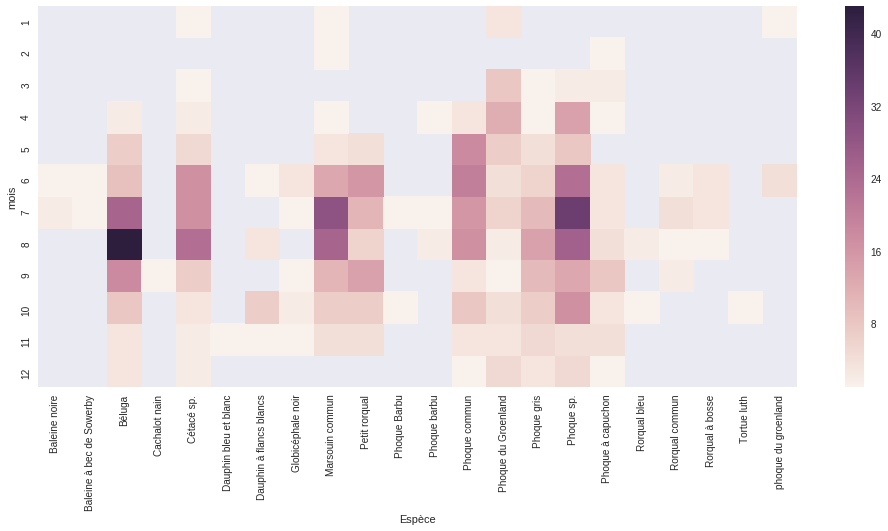

In [15]:
ax = plt.figure(figsize=(17,7))
sns.heatmap(rqumm_df_without_outliers.groupby(['mois',"Espèce"])["Espèce"].count().unstack())

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Ici, nous avons mis en relation les espèces et les différents mois de l'année, 1 étant janvier et 12 décembre. Les cartes de chaleurs - heatmap - sont très efficaces pour observer des patrons - patterns - dans les données. Assez vite, par exemple, on peut constater que la distribution, au travers de l'année, des cas de phoques commun, phoques gris et phoque du Groenland est appréciablement différente. Dans ce cas-ci, la relation entre l'espèce et le mois est tellement forte qu'elle pourrait être la base d'une analyse prédictive. Regardons plus en détails. <br><br>Mais, avant tout, nous allons uniformiser la colonne du phoque du groenland (la dernière valeur à droite est en minuscule, alors qu'elle doit être compris comme faisant parti du groupe 'Phoque du Groenland.) 
</span></div>



In [16]:
for x in range(len(rqumm_df_without_outliers)):
    if rqumm_df_without_outliers.iloc[x].loc['Espèce'] == 'phoque du groenland':
        rqumm_df_without_outliers.iloc[x].loc['Espèce'] == 'Phoque du Groenland'

In [17]:
phoque_list = ['Phoque commun', 'Phoque du Groenland', 'Phoque gris']
scatter_list = []

for x in range(len(phoque_list)):
    idx = phoque_list[x]
    scatter_list.append(
        go.Scatter(
            x = rqumm_df_without_outliers[rqumm_df_without_outliers['Espèce']==idx].groupby(["mois"]).count().index, 
            y = rqumm_df_without_outliers[rqumm_df_without_outliers['Espèce']==idx].groupby(["mois"]).count().ix[:,0].values, 
            name = idx
        )
    )

layout = go.Layout(
    xaxis = dict(
        range=np.arange(1,13)
    ),
    title = 'Espèce de phoques selon le mois',
    height=500, 
    width=950
)

fig = go.Figure(data=scatter_list,layout=layout)
iplot(fig, filename ='espece_phoques_selon_mois.html')

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Selon que l'on soit dans le premier, le deuxième ou le troisième tiers de l'année, les chances que nous ayons affaire avec un cas de phoque du Groenland, de phoque commun ou de phoque gris sont différentes. <br><br> Sans chercher à optimiser notre score, voyons ce que la machine peut nous prédire à partir de cette unique colonne.

Nous allons utiliser un algorithme d'arbre de classification avec sci-kit learn. 
</span></div>



In [18]:
# Création d'une base de données exclusivement sur les phoques dont nous voulons prédire l'espèce.

phoque_df = rqumm_df_without_outliers[
    list(
        map(
            lambda x: rqumm_df_without_outliers['Espèce'][x] in [
                'Phoque commun', 
                'Phoque du Groenland', 
                'Phoque gris'
            ],
            range(
                len(
                    rqumm_df_without_outliers
                )
            )
        )
    )
]
phoque_df.head()

,No d'incident,Date de l'appel,Type d'incident,Espèce,Nombre d'individus,Région,Municipalité,Lieu / Secteur,Latitude,Longitude,Indice de position,mois
0,2016001,2016-01-07,Carcasse rivage,Phoque du Groenland,1,Fleuve aval,Portneuf,NaN,46.686630,-71.890343,2,1
1,2016002,2016-01-12,Carcasse rivage,Phoque du Groenland,1,Bas-Saint-Laurent,Rimouski,Pointe-au-Père,48.527828,-68.427830,2,1
3,2016004,2016-01-28,Carcasse rivage,Phoque du Groenland,1,Bas-Saint-Laurent,La Pocatière,NaN,47.379900,-70.054836,6,1
7,2016008,2016-04-16,Carcasse rivage,Phoque gris,1,Gaspésie,Sainte-Anne-des-Monts,NaN,49.126058,-66.542286,2,4
9,2016010,2016-04-24,Carcasse rivage,Phoque du Groenland,1,Bas-Saint-Laurent,Rimouski,NaN,48.528111,-68.426920,2,4


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

l=[]
for x in range(20):
    dtree = DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(
            phoque_df["mois"]
        ),
        phoque_df['Espèce'],
        test_size=0.30
    )
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    l.append(float(classification_report(y_test,predictions).split()[-4]))
np.mean(l)

0.59799999999999998

In [125]:
classe = ['Phoque du Groenland', 'Phoque gris', 'Phoque commun']
score_l = []

for y in range(20):
    pred_l = []
    for x in range(len(y_test)):
        r = np.random.randint(0,3)
        pred_l.append(classe[r])
    score_l.append(float(classification_report(y_test,pred_l).split()[-4]))
np.mean(score_l)

0.373

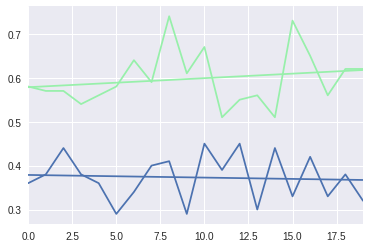

In [126]:
sns.tsplot(data=l, color='g')
plt.plot(range(len(l)), np.poly1d(np.polyfit(range(len(l)), l, 1))(np.unique(range(len(l)))),color="g")
sns.tsplot(data=score_l)
plt.plot(range(len(score_l)), np.poly1d(np.polyfit(range(len(score_l)), score_l, 1))(np.unique(range(len(score_l)))))

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Nous avons un bon score de départ avec une seule colonne. Nous avons effectué vingt fois une prédiction avec l'algorithme à partir de la colonne mois, et vingt fois une prédiction aléatoire. On obtient une prédiction moyenne d'environ 60% d'un bord, puis de 36% de l'autre. La seule colonne du mois nous permet quasiement de doubler notre performance. 
</span></div>

###### <span style="color: black; font-family: Babas Neue; font-size: 2em;">2.0 Liste des sites d'observation </span>

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Nous allons télécharger la liste des sites d'observation et essayer de déterminer si ceux-ci peuvent être révélateur, d'une manière ou d'une autre, de l'occurence de situations d'urgence. Nous commençerons par les phoques choisis plus haut, mais nous reviendrons aux autres espèces aussi, car il est fort probable que le fait que le cas soit à l'intérieur d'un site ou non soit plus parleur du côté des bélugas, des baleines et des différents cétacés. 
</span></div>

###### <div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;">1.1 Téléchargement</span></div>

In [45]:
!wget -c http://catalogue.ogsl.ca/dataset/fcde23ac-52db-4b47-97bc-6b3c1af64594/resource/3297e00b-cd7f-43c5-bca9-301a33dc2827/download/points-gps.zip
!unzip -o points-gps.zip

--2017-09-11 19:18:02--  http://catalogue.ogsl.ca/dataset/fcde23ac-52db-4b47-97bc-6b3c1af64594/resource/3297e00b-cd7f-43c5-bca9-301a33dc2827/download/points-gps.zip
Résolution de catalogue.ogsl.ca (catalogue.ogsl.ca)… 132.215.7.30
Connexion à catalogue.ogsl.ca (catalogue.ogsl.ca)|132.215.7.30|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 1947 (1,9K) [application/zip]
Sauvegarde en : « points-gps.zip »

points-gps.zip      100%[===================>]   1,90K  --.-KB/s    in 0,002s  

2017-09-11 19:18:02 (827 KB/s) — « points-gps.zip » sauvegardé [1947/1947]

Archive:  points-gps.zip
 extracting: Points GPS/Site terrestre.cpg  
  inflating: Points GPS/Site terrestre.dbf  
  inflating: Points GPS/Site terrestre.prj  
  inflating: Points GPS/Site terrestre.sbn  
  inflating: Points GPS/Site terrestre.sbx  
  inflating: Points GPS/Site terrestre.shp  
  inflating: Points GPS/Site terrestre.shx  


In [54]:
from simpledbf import Dbf5

dbf = Dbf5('Points GPS/Site terrestre.dbf', codec='utf-8')
dbf.to_csv('Site terrestre.csv')
site_observation = pd.read_csv('Site terrestre.csv')

geodata = [(48.1635,-69.5617),(48.0819,-69.4305),
           (48.1620,-69.2812),(48.1914,-69.2455),
           (48.3829,-69.0512),(48.4920,-68.5225),
           (49.0343,-68.3257),(49.1421,-68.0838),
           (49.1751,-67.5028),(49.1909,-67.3548),
           (49.1935,-67.2209),(49.2157,-67.2009)]

site_observation['COORDINATES'] = geodata


lat_list,long_list = [],[]

for x in range(len(site_observation)):
    lat_list.append(site_observation.ix[x,'COORDINATES'][0])
    long_list.append(site_observation.ix[x,'COORDINATES'][1])
        
mean_lat, mean_long = np.mean(lat_list), np.mean(long_list)#

site_observation

,Id,Site,COORDINATES
0,1,La Baie-Sainte-Marguerite,"(48.1635, -69.5617)"
1,2,Sentier de la Pointe-de-l'Islet,"(48.0819, -69.4305)"
2,3,Centre d'observation de Cap-de-Bon-Désir,"(48.162, -69.2812)"
3,4,Centre de découverte du milieu marin,"(48.1914, -69.2455)"
4,5,Pointe des Fortin,"(48.3829, -69.0512)"
5,6,Cap colombier,"(48.492, -68.5225)"
6,7,Archipel de Ragueneau,"(49.0343, -68.3257)"
7,8,Parc d'aventure maritime,"(49.1421, -68.0838)"
8,10,Baie de Godbout,"(49.1751, -67.5028)"
9,9,Pointe-à-la-Croix,"(49.1909, -67.3548)"


In [55]:
import numpy as np

lat,long = [],[]

for x in range(len(site_observation)):
    lat.append(
        site_observation.ix[x,'COORDINATES'][0]
    )
    long.append(
        site_observation.ix[x,'COORDINATES'][1]
    )
        
mean_lat, mean_long = np.mean(lat), np.mean(long)

In [56]:
import folium

map2 = folium.Map(location=[mean_lat, mean_long], zoom_start=6)

phoque_df = phoque_df.reset_index()

species_color = {
    'Phoque commun' : 'blue', 
    'Phoque du Groenland' : 'red', 
    'Phoque gris' : 'green'
}

for x in range(len(phoque_df)):
    folium.CircleMarker(
        location=[
            phoque_df.ix[x,'Latitude'],
            phoque_df.ix[x,'Longitude']
        ],
        radius=4, 
        color=species_color[phoque_df.ix[x,'Espèce']]
    ).add_to(map2)
    
for y in range(len(site_observation)):
    folium.CircleMarker(
        location=[
            site_observation['COORDINATES'][y][0],
            site_observation['COORDINATES'][y][1]
        ],
        radius=10,
        color='yellow'
    ).add_to(map2)
    
map2

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Cette première carte souffre de deux problèmes au moins : 1) Il n'y a pas de légendes; 2) les cercles des sites d'observation sont à grandeur variable. Si nous voulons créer un algorithme qui va nous dire si tel cas est à l'intérieur d'un site ou non, la grandeur du cercle se doit d'être fixe.

<br><br> Il y a plusieurs manières de régler ses problèmes. Dans un premier cas, nous allons créer une légende sur mesure avec le module branca, et dans le deuxième, nous allons créer manuellement les zones d'observation en réalisant un dodécagone. À partir du point milieu et du nombre de kilomètres souhaité pour le rayon, nous allons créer une fonction qui va générer les points de notre dodécagone.
</span></div>

In [62]:
import math

def gen_dodecagon_pts(long, lat, km):
    kmlat = km * (360/40075)
    kmlong = km * (360/(math.cos(math.radians(lat))*40075))
    
    diaglat = 0.71 * (kmlat)
    diaglong = 0.71 * (kmlong)

    return ([[long, lat+kmlat], [long+diaglong,lat+diaglat],
             [long+kmlong, lat], [long+diaglong,lat-diaglat],
             [long, lat-kmlat], [long-diaglong,lat-diaglat],
             [long-kmlong, lat], [long-diaglong,lat+diaglat],[long, lat+kmlat]])

features_list = []

for x in range(len(site_observation)):
    features_list.append(
        {
            "type":'Feature',
            "geometry": {
                "type" : "LineString", 
                "coordinates": gen_dodecagon_pts(
                    site_observation.ix[x,'COORDINATES'][1],
                    site_observation.ix[x,'COORDINATES'][0],
                    10
                )
            }
        }
    )
    
geojson = {"type" :"FeatureCollection","features" : features_list}

map3 = folium.Map(location=[mean_lat, mean_long], zoom_start=8, tiles ='Stamen Terrain')
    
folium.GeoJson(geojson, name="Zone d'observation").add_to(map3)


for x in range(len(phoque_df)):
    folium.CircleMarker(
        location=[
            phoque_df.ix[x,'Latitude'],
            phoque_df.ix[x,'Longitude']
        ],
        radius=4, 
        color=species_color[phoque_df.ix[x,'Espèce']]
    ).add_to(map3)

#folium.LayerControl().add_to(map3)
import branca.colormap as cm
colormap = cm.StepColormap(['green', 'blue', 'red'],
                           vmin=0, vmax=3,
                           index=[0,1,2],  
                           caption= 'Green = Phoque gris, Blue = Phoque Commun, Red = Phoque du Groenland')

map3.add_child(colormap)

map3

<div style="text-align: justify"> <span style="color: black; font-family: Babas Neue; font-size: 1em;"> Le module branca ne semble pas nous permettre de changer directement les valeurs de la légende, nous devons donc inscrire en bas de celle-ci ce à quoi les chiffres font référence. Les cercles, eux, ont dorénavant une valeur fixe. <br><br> N'ayant pas réellement obtenu de résultats probants, nous allons aggrandir notre sélection d'espèce et retenir le cas de Tadoussac. 
</span></div>

In [ ]:
import math

def gen_dodecagon_pts(long, lat, km):

features_list = []


features_list.append(
    {
        "type":'Feature',
        "geometry": {
            "type" : "LineString", 
            "coordinates": gen_dodecagon_pts(
                site_observation.ix[0,'COORDINATES'][1],
                site_observation.ix[0,'COORDINATES'][0],
                10
            )
        }
    }
)
    
tad_geojson = {"type" :"FeatureCollection","features" : features_list}

map3 = folium.Map(
    location=[
        site_observation.ix[0,'COORDINATES'][1],
        site_observation.ix[0,'COORDINATES'][0]
    ], 
    zoom_start=8, 
    tiles ='Stamen Terrain'
)
    
folium.GeoJson(tad_geojson, name="Zone d'observation").add_to(map3)


rqumm_df



for x in range(len(tadoussac_df)):
    folium.CircleMarker(
        location=[
            tadoussac_df.ix[x,'Latitude'],
            tadoussac_df.ix[x,'Longitude']
        ],
        radius=4
    ).add_to(map3)

#folium.LayerControl().add_to(map3)
import branca.colormap as cm
colormap = cm.StepColormap(['green', 'blue', 'red'],
                           vmin=0, vmax=3,
                           index=[0,1,2],  
                           caption= 'Green = Phoque gris, Blue = Phoque Commun, Red = Phoque du Groenland')

map3.add_child(colormap)

map3

In [150]:
tadoussac_df = rqumm_df[rqumm_df['Municipalité'] =='Tadoussac']

In [154]:
features_list = []

color = sns.color_palette("hls", 10).as_hex()


features_list.append(
    {
        "type":'Feature',
        "geometry": {
            "type" : "LineString", 
            "coordinates": gen_dodecagon_pts(
                site_observation.ix[0,'COORDINATES'][1],
                site_observation.ix[0,'COORDINATES'][0],
                5
            )
        }
    }
)
    
tad_geojson = {"type" :"FeatureCollection","features" : features_list}

map4 = folium.Map(
    location=[
        site_observation.ix[0,'COORDINATES'][0],
        site_observation.ix[0,'COORDINATES'][1]
    ], 
    zoom_start=11
)
    
folium.GeoJson(tad_geojson, name="Zone d'observation").add_to(map4)

l_espece = list(set(tadoussac_df['Espèce']))


features_list = []

for x in range(len(l_espece)):
    features_list.append(folium.FeatureGroup(name=l_espece[x]))
    temp_df = tadoussac_df[tadoussac_df['Espèce'] == l_espece[x]].reset_index()
    for y in range(len(temp_df)):
        folium.CircleMarker(
            location=[temp_df.ix[y,'Latitude'],
                      temp_df.ix[y,'Longitude']],
            color=color[x],
            radius=5,
            fill_color = color[x],
            fill_opacity = 1).add_to(features_list[x])
        
        
for x in range(len(features_list)):
    features_list[x].add_to(map4)
    
folium.LayerControl().add_to(map4)
map4

In [127]:
from shapely.geometry import Polygon, Point

In [129]:
poly = Polygon(gen_dodecagon_pts(site_observation.ix[0,'COORDINATES'][1],site_observation.ix[0,'COORDINATES'][0],5))

In [155]:
tadoussac_df = tadoussac_df.reset_index(drop=True)

tadoussac_df['inside_observation_site'] = list(
    map(
        lambda x: Point(
            tadoussac_df.ix[x,'Longitude'],
            tadoussac_df.ix[x,'Latitude']
        ).within(poly),
    range(
        len(
            tadoussac_df
        )
    )
    )
)

tadoussac_df['is_marsouin'] = list(
    map(
        lambda x: tadoussac_df.ix[x,"Espèce"] == 'Marsouin commun',
    range(
        len(
            tadoussac_df
        )
    )
    )
)

In [159]:
tadoussac_df

,No d'incident,Date de l'appel,Type d'incident,Espèce,Nombre d'individus,Région,Municipalité,Lieu / Secteur,Latitude,Longitude,Indice de position,inside_observation_site,is_marsouin
0,2016034,2016-06-25,Carcasse en mer,Cétacé sp.,1,Côte-Nord,Tadoussac,PMSSL,48.138829,-69.602337,6,True,False
1,2016062,2016-07-27,Blessé/Malade,Rorqual commun,1,Côte-Nord,Tadoussac,PMSSL,48.182222,-69.383611,1,False,False
2,2016081,2016-08-11,Blessé/Malade,Petit rorqual,1,Côte-Nord,Tadoussac,NaN,48.122101,-69.589291,5,False,False
3,2016082,2016-08-10,Blessé/Malade,Béluga,1,Côte-Nord,Tadoussac,NaN,48.128260,-69.728723,4,False,False
4,2016084,2016-08-12,Carcasse en mer,Cétacé sp.,1,Côte-Nord,Tadoussac,Pointe à la Carriole,48.117300,-69.550500,1,False,False
5,2016086,2016-08-15,Carcasse en mer,Phoque commun,1,Côte-Nord,Tadoussac,Marina,48.138213,-69.715236,3,False,False
6,2015090,2015-08-21,Carcasse en mer,Marsouin commun,1,Côte-Nord,Tadoussac,NaN,48.136423,-69.574013,6,True,True
7,2015083,2015-08-14,Carcasse en mer,Marsouin commun,Morceaux,Côte-Nord,Tadoussac,Falaise de glaise,48.168300,-69.547500,1,True,True
8,2015016,2015-06-02,Blessé/Malade,Rorqual à bosse,1,Côte-Nord,Tadoussac,NaN,48.131382,-69.606800,6,True,False
9,2015015,2015-06-02,Blessé/Malade,Béluga,1,Côte-Nord,Tadoussac,Falaises de glaise/S8,48.124737,-69.672546,5,False,False


In [232]:
l=[]
for x in range(100):
    dtree = DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(
            tadoussac_df["is_marsouin"]
        ),
        tadoussac_df['inside_observation_site'],
        test_size=0.30
    )
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    l.append(float(classification_report(y_test,predictions).split()[-4]))
print (np.mean(l))


classe = [True, False]
score_l = []

for y in range(100):
    pred_l = []
    for x in range(len(y_test)):
        r = np.random.randint(0,2)
        pred_l.append(classe[r])
    score_l.append(float(classification_report(y_test,pred_l).split()[-4]))
print(np.mean(score_l))

/home/maison/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



0.7517
0.4977


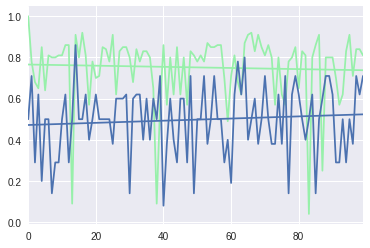

In [233]:
sns.tsplot(data=l, color='g')
plt.plot(range(len(l)), np.poly1d(np.polyfit(range(len(l)), l, 1))(np.unique(range(len(l)))),color="g")
sns.tsplot(data=score_l)
plt.plot(range(len(score_l)), np.poly1d(np.polyfit(range(len(score_l)), score_l, 1))(np.unique(range(len(score_l)))))

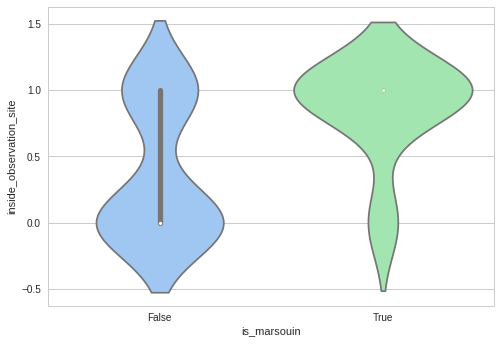

In [249]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Load the example titanic dataset
#df = sns.load_dataset("titanic")

g = sns.violinplot(x='is_marsouin', y = 'inside_observation_site',data=tadoussac_df)

In [89]:
l = []

In [90]:
l[0] = 1

IndexError: list assignment index out of range